# Import Libraries needed

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [30]:
df = pd.read_csv("quezon_merged_all_months.csv")

# Feature Engineering

In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear

# Convert 'Phase' into a numerical feature (1 for First Phase, 2 for Second Phase)
df['Phase_Num'] = df['Phase'].apply(lambda x: 1 if 'First' in x else 2)

# --- Encoding Categorical Features ---
# Use One-Hot Encoding for 'Commodity' and 'CommodityType'
# This creates new binary columns for each category
df_processed = pd.get_dummies(df, columns=['Commodity', 'CommodityType'], drop_first=True)
df_processed.columns = [re.sub(r'[^A-Za-z0-9_]+', '_', col) for col in df_processed.columns]

# --- Define Features (X) and Target (y) ---
X = df_processed.drop(columns=['Province', 'Phase', 'Price', 'Date'])
y = df_processed['Price']

# --- Split Data into Training and Testing Sets ---
# 80% for training, 20% for testing. random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (422, 29)
Testing set shape: (106, 29)


# Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

# 1. Initialize the model
lr_model = LinearRegression()

# 2. Train the model on the training data
lr_model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# 4. Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- Linear Regression Results ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.4f}")


--- Linear Regression Results ---
Mean Absolute Error (MAE): 19.54
Mean Squared Error (MSE): 1013.93
R-squared (R²): 0.9474


# Random Forest Regressor Model

In [33]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Results ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


--- Random Forest Regressor Results ---
Mean Absolute Error (MAE): 11.73
Mean Squared Error (MSE): 516.95
R-squared (R²): 0.9732


# XGBoost Model

In [34]:
import xgboost as xgb

# 1. Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- XGBoost Regressor Results ---")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.4f}")


--- XGBoost Regressor Results ---
Mean Absolute Error (MAE): 12.33
Mean Squared Error (MSE): 600.07
R-squared (R²): 0.9689


# LightGBM Model

In [35]:
import lightgbm as lgb

# 1. Initialize the model, setting verbosity=-1 to hide all non-error output.
lgb_model = lgb.LGBMRegressor(
    n_estimators=100, 
    random_state=42, 
    verbosity=-1  
)

# 2. Train the model
lgb_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# 4. Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("\n--- LightGBM Regressor Results ---")
print(f"Mean Absolute Error (MAE): {mae_lgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"R-squared (R²): {r2_lgb:.4f}")


--- LightGBM Regressor Results ---
Mean Absolute Error (MAE): 30.45
Mean Squared Error (MSE): 1964.62
R-squared (R²): 0.8982


# SVR (Support Vector Regression) Model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR is sensitive to feature scales, so we must scale the data.
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 1. Initialize the model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')

# 2. Train the model on the SCALED data
svr_model.fit(X_train_scaled, y_train)

# 3. Make predictions on the SCALED test data
y_pred_svr = svr_model.predict(X_test_scaled)

# 4. Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\n--- Support Vector Regression (SVR) Results ---")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared (R²): {r2_svr:.4f}")


--- Support Vector Regression (SVR) Results ---
Mean Absolute Error (MAE): 15.93
Mean Squared Error (MSE): 843.36
R-squared (R²): 0.9563


# LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import numpy as np

#1 LSTM-Specific Data Structuring
TIME_STEPS = 3  # We will use the last 3 data points to predict the next one.

def create_sequences(X_data, y_data, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X_data) - time_steps):
        v = X_data.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y_data.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

all_X_seq, all_y_seq = [], []

# Group by commodity and create sequences for each one
for commodity_name in df['Commodity'].unique():
    cleaned_name = re.sub(r'[^A-Za-z0-9_]+', '_', commodity_name)
    column_to_find = f'Commodity_{cleaned_name}'

    # Check if the cleaned column name actually exists
    if column_to_find not in df_processed.columns:
        print(f"Warning: Could not find column '{column_to_find}' for commodity '{commodity_name}'. Skipping.")
        continue
        
    # Filter data for the current commodity, sorted by date
    # USE THE CLEANED NAME to find the column
    commodity_df = df_processed[df_processed[column_to_find] == 1].sort_values('Date')

    if len(commodity_df) < TIME_STEPS + 1:
        continue

    # Define features and target for this specific commodity
    y_commodity = commodity_df['Price']
    X_commodity = commodity_df.drop(columns=['Price', 'Province', 'Phase', 'Date'])
    
    # Create the sequences
    X_seq, y_seq = create_sequences(X_commodity, y_commodity, TIME_STEPS)
    
    if X_seq.shape[0] > 0:
        all_X_seq.append(X_seq)
        all_y_seq.append(y_seq)

# Combine all sequences into one large dataset, if any were created
if not all_X_seq:
    print("Error: No sequences were created. Check data and parameters.")
else:
    X_lstm = np.concatenate(all_X_seq)
    y_lstm = np.concatenate(all_y_seq)

    print(f"Original shape of features: {X.shape}")
    print(f"Shape of sequential features for LSTM: {X_lstm.shape}")
    print(f"Shape of sequential target for LSTM: {y_lstm.shape}")

Original shape of features: (528, 29)
Shape of sequential features for LSTM: (441, 3, 29)
Shape of sequential target for LSTM: (441,)


In [55]:
#2: Combine, Split, and Scale LSTM Data
if not all_X_seq:
    print("Error: No sequences were created for the LSTM. The script cannot continue with the LSTM part.")
else:
    X_lstm = np.concatenate(all_X_seq)
    y_lstm = np.concatenate(all_y_seq)
    print(f"\nShape of sequential features for LSTM: {X_lstm.shape}")
    print(f"Shape of sequential target for LSTM: {y_lstm.shape}")

    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
        X_lstm, y_lstm, test_size=0.2, random_state=42
    )

    # Scale LSTM features (3D -> 2D -> scale -> 3D)
    n_features = X_train_lstm.shape[2]
    scaler_X_lstm = StandardScaler()
    X_train_scaled = scaler_X_lstm.fit_transform(X_train_lstm.reshape(-1, n_features)).reshape(X_train_lstm.shape)
    X_test_scaled = scaler_X_lstm.transform(X_test_lstm.reshape(-1, n_features)).reshape(X_test_lstm.shape)

    # Scale LSTM target
    scaler_y_lstm = StandardScaler()
    y_train_scaled = scaler_y_lstm.fit_transform(y_train_lstm.reshape(-1, 1))


Shape of sequential features for LSTM: (441, 3, 29)
Shape of sequential target for LSTM: (441,)


In [47]:
#3: Build, Train, and Evaluate LSTM 

lstm_model = Sequential([
        Input(shape=(TIME_STEPS, n_features)),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=25, activation='relu'),
        Dense(units=1)
    ])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()

history = lstm_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
)
print("LSTM training complete.")

y_pred_scaled = lstm_model.predict(X_test_scaled)
y_pred_lstm = scaler_y_lstm.inverse_transform(y_pred_scaled)

mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
print(f"\nLSTM Results -> MAE: {mae_lstm:.2f}, MSE: {mse_lstm:.2f}, R²: {r2_lstm:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,501 (146.49 KB)

 Trainable params: 37,501 (146.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.8736 - val_loss: 0.8303
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7329 - val_loss: 0.5495
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4696 - val_loss: 0.2127
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1884 - val_loss: 0.0670
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0858 - val_loss: 0.0556
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0541 - val_loss: 0.0393
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0718 - val_loss: 0.0351
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0602 - val_loss: 0.0295
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0540 - val_loss: 0.0212
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0502 - val_loss: 0.0241
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0463 - val_loss: 0.0292
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

# Model Evaluation/Comparison and Graphs

## Model Comparison

In [54]:
lstm_exists = 'mae_lstm' in locals()
model_data = {
    'Model': [
        'Linear Regression', 'Random Forest', 'XGBoost', 
        'LightGBM', 'SVR'
    ],
    'MAE': [
        locals().get('mae_lr', 0), locals().get('mae_rf', 0), locals().get('mae_xgb', 0),
        locals().get('mae_lgb', 0), locals().get('mae_svr', 0)
    ],
    'MSE': [
        locals().get('mse_lr', 0), locals().get('mse_rf', 0), locals().get('mse_xgb', 0),
        locals().get('mse_lgb', 0), locals().get('mse_svr', 0)
    ],
    'R-squared (R²)': [
        locals().get('r2_lr', 0), locals().get('r2_rf', 0), locals().get('r2_xgb', 0),
        locals().get('r2_lgb', 0), locals().get('r2_svr', 0)
    ]
}

if lstm_exists:
    model_data['Model'].append('LSTM')
    model_data['MAE'].append(locals().get('mae_lstm', 0))
    model_data['MSE'].append(locals().get('mse_lstm', 0))
    model_data['R-squared (R²)'].append(locals().get('r2_lstm', 0))

# Create the DataFrame and sort it by the best performance (lowest error)
comparison_df = pd.DataFrame(model_data).sort_values(by='MAE', ascending=True)
comparison_df.set_index('Model', inplace=True)
comparison_df

,MAE,MSE,R-squared (R²)
Model,,,
LSTM,9.106542,166.215021,0.991704
Random Forest,11.728702,516.948041,0.973201
XGBoost,12.328767,600.072918,0.968892
SVR,15.929234,843.357062,0.956280
Linear Regression,19.543632,1013.927665,0.947437
LightGBM,30.450470,1964.617134,0.898153


## Visualization

C:\Users\Miggy\AppData\Local\Temp\ipykernel_25176\1836044782.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=plot_df.sort_values('MAE', ascending=True), palette='viridis', ax=ax1)
C:\Users\Miggy\AppData\Local\Temp\ipykernel_25176\1836044782.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=plot_df.sort_values('MSE', ascending=True), palette='plasma', ax=ax2)
C:\Users\Miggy\AppData\Local\Temp\ipykernel_25176\1836044782.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R-squared (

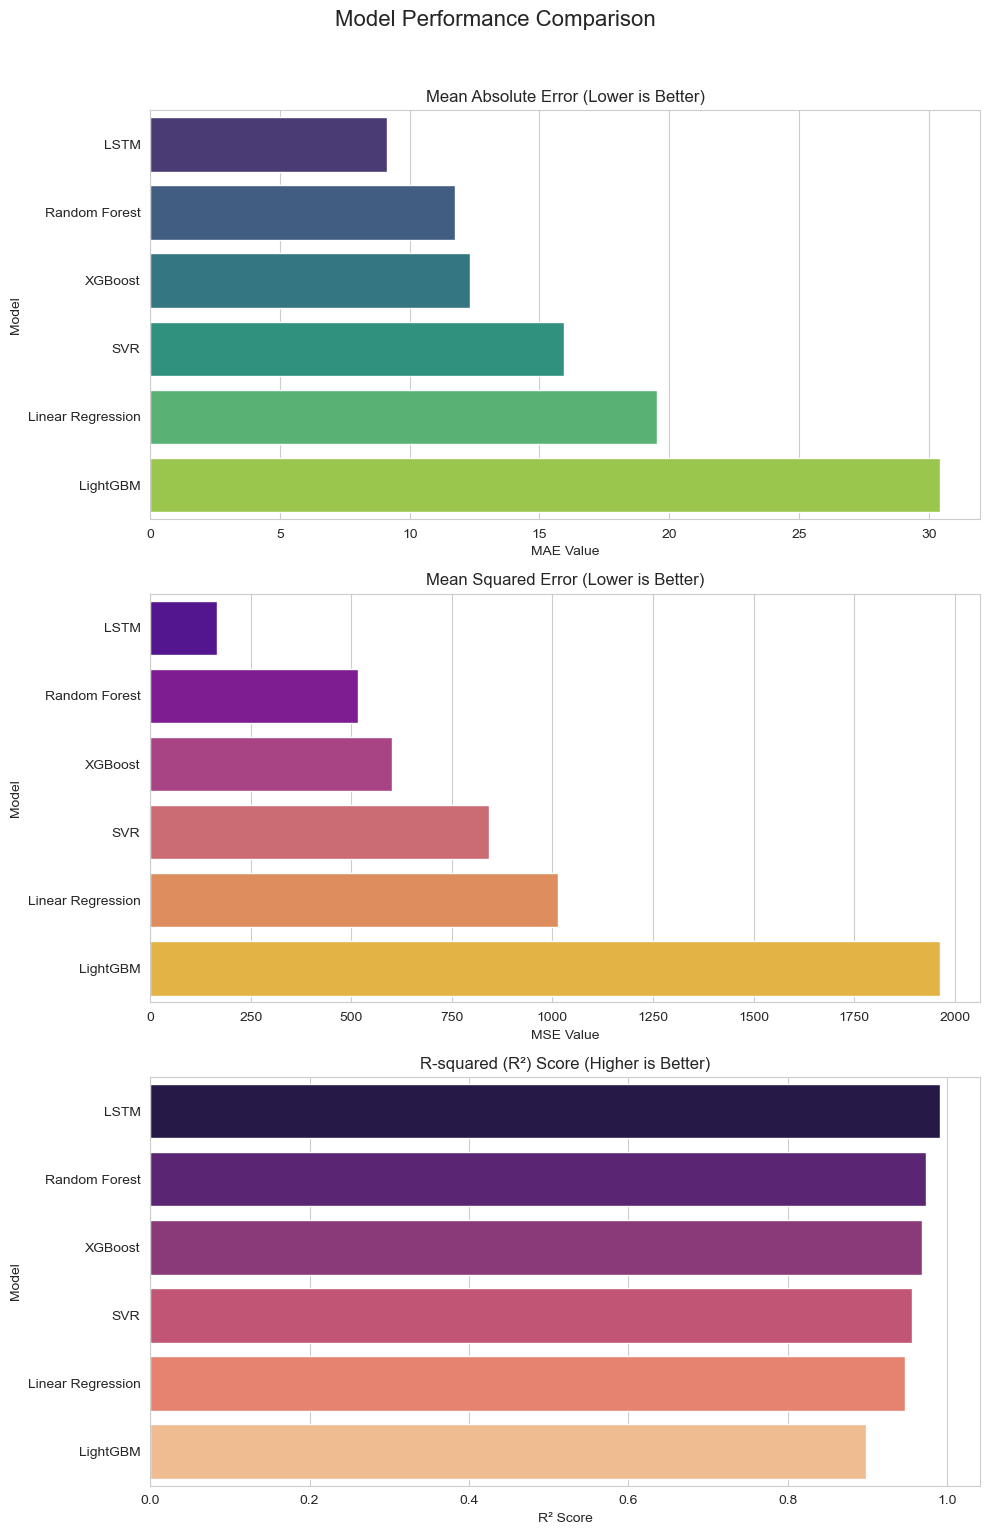

In [52]:
# Reset index to use 'Model' as a column for plotting
plot_df = comparison_df.reset_index()

# Set up the plot style
sns.set_style("whitegrid")

# Create a figure for the bar charts
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Model Performance Comparison', fontsize=16, y=1.02)

# Plot 1: Mean Absolute Error (MAE) - Lower is better
sns.barplot(x='MAE', y='Model', data=plot_df.sort_values('MAE', ascending=True), palette='viridis', ax=ax1)
ax1.set_title('Mean Absolute Error (Lower is Better)')
ax1.set_xlabel('MAE Value')
ax1.set_ylabel('Model')

# Plot 2: Mean Squared Error (MSE) - Lower is better
sns.barplot(x='MSE', y='Model', data=plot_df.sort_values('MSE', ascending=True), palette='plasma', ax=ax2)
ax2.set_title('Mean Squared Error (Lower is Better)')
ax2.set_xlabel('MSE Value')
ax2.set_ylabel('Model')

# Plot 3: R-squared (R²) - Higher is better
sns.barplot(x='R-squared (R²)', y='Model', data=plot_df.sort_values('R-squared (R²)', ascending=False), palette='magma', ax=ax3)
ax3.set_title('R-squared (R²) Score (Higher is Better)')
ax3.set_xlabel('R² Score')
ax3.set_ylabel('Model')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

# Visualization Actual vs Predicted Values for the Best Model

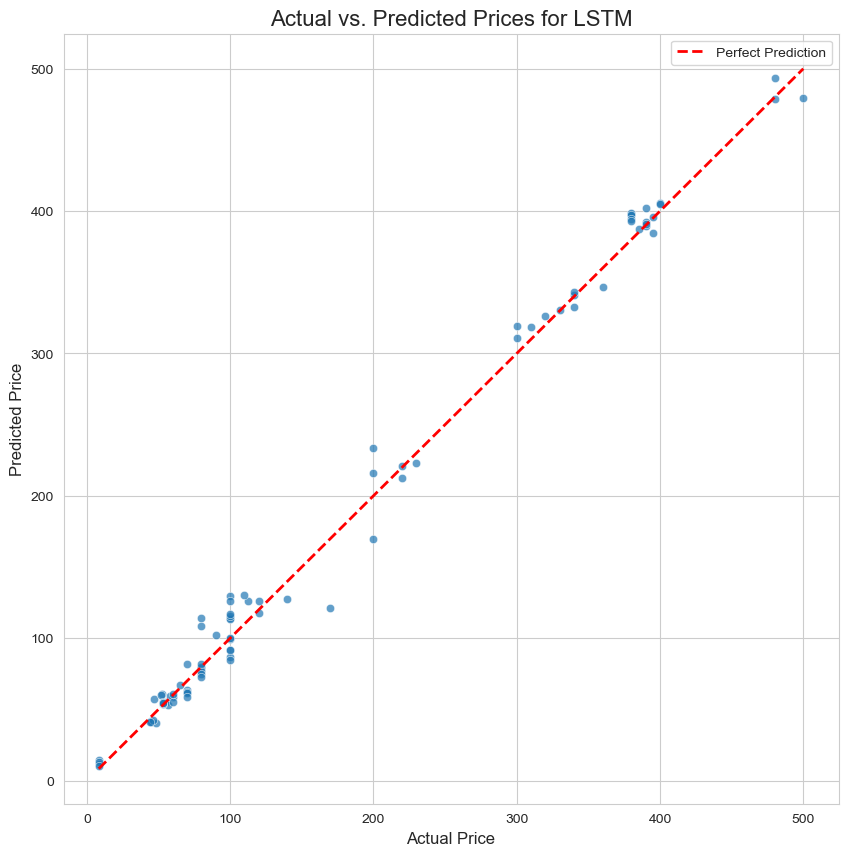

In [53]:
# Find the best model based on R-squared score
best_model_name = comparison_df['R-squared (R²)'].idxmax()

# Store predictions in a dictionary to easily retrieve them
predictions = {
    'Linear Regression': locals().get('y_pred_lr'),
    'Random Forest': locals().get('y_pred_rf'),
    'XGBoost': locals().get('y_pred_xgb'),
    'LightGBM': locals().get('y_pred_lgb'),
    'SVR': locals().get('y_pred_svr'),
    'LSTM': locals().get('y_pred_lstm')
}

best_predictions = predictions[best_model_name]

if best_model_name == 'LSTM' and lstm_exists:
    actual_values = y_test_lstm
else:
    actual_values = y_test

# Create the scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=actual_values, y=best_predictions.flatten(), alpha=0.7)

# Add the perfect prediction line (y=x)
min_val = min(actual_values.min(), best_predictions.min())
max_val = max(actual_values.max(), best_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title(f'Actual vs. Predicted Prices for {best_model_name}', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Analysis (Bar Chart)

### Model Performance Comparison Analysis

1. Mean Absolute Error (MAE) - Lower is Better


Top Performer: The LSTM model has the lowest MAE, with an average error of approximately 9. This means, on average, its price prediction is off by only 9 units.


High Performers: Random Forest and XGBoost form a close second tier, with MAEs around 10-12.


Mid-Tier: SVR and Linear Regression show moderate error.


Underperformer: LightGBM performs surprisingly poorly, with a very high MAE of over 30.


2. Mean Squared Error (MSE) - Lower is Better


Top Performer: The LSTM again demonstrates its superiority with the lowest MSE value (under 250).


Key Insight: The gap between models is much larger in the MSE chart. This metric penalizes large errors more heavily. The extremely high MSE for LightGBM (~1950) suggests that while its average error was high, it also made a few very large, inaccurate predictions that were squared, dramatically increasing its MSE. The LSTM, by contrast, had no such catastrophic errors.


3. R-squared (R²) Score - Higher is Better


Top Performer: The LSTM achieves an R² score that is nearly a perfect 1.0. This indicates that the model can explain over 99% of the variance in the commodity prices, which is an exceptional result.


High Performers: Random Forest and XGBoost also have excellent R² scores, but they are visibly lower than the LSTM's.


Conclusion: This chart solidifies the LSTM's dominance. It not only has the lowest error but also the best explanatory power.

# Analysis Best Model (Scatter Plot)

Exceptional Accuracy: The data points form a very tight, linear cluster that aligns almost perfectly with the red "Perfect Prediction" line. This is the visual confirmation of the low MAE and high R² score seen in the bar charts.


No Discernible Bias: The points are evenly distributed on both sides of the red line. The model does not systematically over-predict or under-predict prices.


Consistent Performance: The model's accuracy is robust across all price levels. It performs just as well for low-priced items (e.g., under 100) as it does for high-priced items (e.g., 400-500). This indicates that the model has learned the underlying data patterns and can generalize well.


Minimal Outliers: There are very few points that stray far from the line, which explains why the MSE score was so low. The model's errors are small and infrequent.


The data represents a time series, where the price of a commodity at one point in time is related to its price at previous points. The LSTM architecture is specifically designed to capture these sequential, time-dependent patterns. The other models (Random Forest, XGBoost, etc.), while powerful, treat each row as an independent event and are less effective at learning from the temporal order of the data.


The combination of quantitative metrics (bar charts) and qualitative visual evidence (scatter plot) provides overwhelming support for the LSTM model. It is accurate, reliable, and well-suited for this dataset.
